# Шаг 1. Выполним загрузку и первичный осмотр данных.

In [2]:
import pandas as pd
 
# Загрузка данных
df = pd.read_csv("data/uber-raw-data-sep14.csv")
 
# Первые строки
print(df.head())
 
# Информация о данных
print(df.info())

          Date/Time      Lat      Lon    Base
0  9/1/2014 0:01:00  40.2201 -74.0021  B02512
1  9/1/2014 0:01:00  40.7500 -74.0027  B02512
2  9/1/2014 0:03:00  40.7559 -73.9864  B02512
3  9/1/2014 0:06:00  40.7450 -73.9889  B02512
4  9/1/2014 0:11:00  40.8145 -73.9444  B02512
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028136 entries, 0 to 1028135
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype  
---  ------     --------------    -----  
 0   Date/Time  1028136 non-null  object 
 1   Lat        1028136 non-null  float64
 2   Lon        1028136 non-null  float64
 3   Base       1028136 non-null  object 
dtypes: float64(2), object(2)
memory usage: 31.4+ MB
None


# Шаг 2. Приведем время к нормальному формату.

In [3]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


# Шаг 3. Выполним построение суточного ряда заказов.

In [4]:
# Группировка по дате
daily_orders = df.groupby(df['Date/Time'].dt.date).size()
 
# Превращаем в DataFrame
daily_orders = pd.DataFrame(daily_orders, columns=['orders'])
 
# Делаем индекс датой
daily_orders.index = pd.to_datetime(daily_orders.index)
 
daily_orders.head()

,orders
Date/Time,
2014-09-01,19961
2014-09-02,28831
2014-09-03,32631
2014-09-04,38360
2014-09-05,42319


# Шаг 4. Выполним очистку данных.

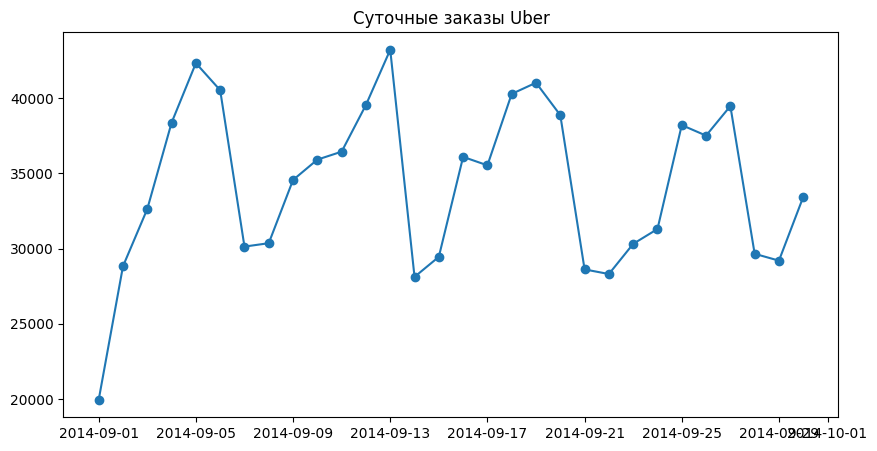

In [7]:
import matplotlib.pyplot as plt

# Проверка пропусков дат
full_range = pd.date_range(start=daily_orders.index.min(), end=daily_orders.index.max(), freq="D")
daily_orders = daily_orders.reindex(full_range, fill_value=0)
 
# Проверка выбросов
plt.figure(figsize=(10,5))
plt.plot(daily_orders.index, daily_orders['orders'], marker='o')
plt.title("Суточные заказы Uber")
plt.show()

# Шаг 5. Выполним добавление признаков.

In [8]:
daily_orders['lag1'] = daily_orders['orders'].shift(1)
daily_orders['lag2'] = daily_orders['orders'].shift(2)
daily_orders['day_of_week'] = daily_orders.index.dayofweek
daily_orders['is_weekend'] = (daily_orders['day_of_week'] >= 5).astype(int)
 
daily_orders.head()

,orders,lag1,lag2,day_of_week,is_weekend
2014-09-01,19961,NaN,NaN,0,0
2014-09-02,28831,19961.0,NaN,1,0
2014-09-03,32631,28831.0,19961.0,2,0
2014-09-04,38360,32631.0,28831.0,3,0
2014-09-05,42319,38360.0,32631.0,4,0


# Шаг 6. Проверим корреляции.

In [9]:
daily_orders.corr()

,orders,lag1,lag2,day_of_week,is_weekend
orders,1.000000,0.433701,-0.195283,0.401742,0.061997
lag1,0.433701,1.000000,0.431709,0.867939,0.678412
lag2,-0.195283,0.431709,1.000000,0.312427,0.546053
day_of_week,0.401742,0.867939,0.312427,1.000000,0.790425
is_weekend,0.061997,0.678412,0.546053,0.790425,1.000000


# Шаг 7. Выполним визуализацию итогового ряда.

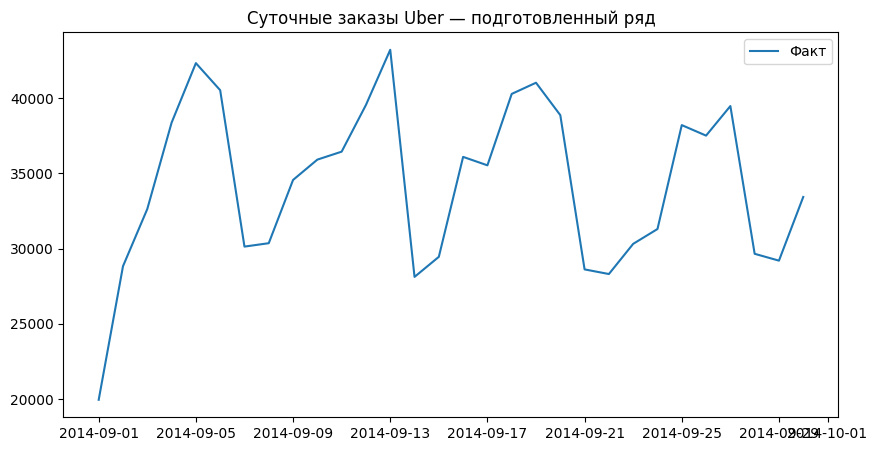

In [10]:
plt.figure(figsize=(10,5))
plt.plot(daily_orders.index, daily_orders['orders'], label="Факт")
plt.title("Суточные заказы Uber — подготовленный ряд")
plt.legend()
plt.show()